<a href="https://colab.research.google.com/github/rahulsing/pytorch_demo/blob/master/03_pytorch_RegressionUsingFullyConnectedCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

# Reading dataset in colab
# https://colab.research.google.com/notebooks/io.ipynb
# automobile dataset
# https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [0]:
#from google.colab import drive
#drive.mount('/content/drive/My Drive/Colab Notebooks/Datasets')



In [1]:
from google.colab import files

uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [2]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Automobile_data.csv" with length 25070 bytes


In [0]:
import io

automobile_data=pd.read_csv(io.StringIO(uploaded['Automobile_data.csv'].decode('utf-8')),sep=r'\s*,\s*',engine='python')

In [44]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [45]:
import numpy as np
automobile_data=automobile_data.replace('?',np.nan)
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [46]:
automobile_data=automobile_data.dropna()
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [47]:
col=['make','fuel-type','body-style','horsepower']
automobile_features=automobile_data[col]
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [20]:
automobile_target=automobile_data[['price']]
automobile_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [21]:
automobile_features.describe()

,make,fuel-type,body-style,horsepower
count,159,159,159,159
unique,18,2,5,48
top,toyota,gas,sedan,68
freq,31,144,79,18


In [23]:
automobile_features['horsepower'].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

In [0]:
#trun of settingWithCopyWarning which warns of unpredictable result with chained assignment
pd.options.mode.chained_assignment=None

In [48]:
automobile_features['horsepower']=pd.to_numeric(automobile_features['horsepower'])
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [29]:
automobile_target['price'].describe()

count      159
unique     145
top       8845
freq         2
Name: price, dtype: object

In [31]:
automobile_target=automobile_target.astype(float)
automobile_target['price'].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [0]:
#one-hot encoding
# convert the categorical data to numerical array as column
automobile_features=pd.get_dummies(automobile_features,columns=['make','fuel-type','body-style'])



In [50]:
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
automobile_features.columns

Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [0]:
from sklearn import preprocessing

In [53]:
# standarizaiton of horsepower
# (value - mean)/standard diviation
# standraization : column values to be roughly in the same range
automobile_features[['horsepower']]=preprocessing.scale(automobile_features[['horsepower']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [54]:
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,x_test,Y_train,y_test=train_test_split(automobile_features,automobile_target,test_size=0.2,random_state=0)
# test size : 20%
# train size: 80 %

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [0]:
# Read for Fully connected NN for automobile price predication
import torch

In [0]:
dtype=torch.float

In [0]:
X_train_tensor=torch.tensor(X_train.values,dtype=dtype)
x_test_tensor=torch.tensor(x_test.values,dtype=dtype)

Y_train_tensor=torch.tensor(Y_train.values,dtype=dtype)
y_test_tensor=torch.tensor(y_test.values,dtype=dtype)

In [69]:
X_train_tensor.shape


torch.Size([127, 1])

In [70]:
Y_train_tensor.shape

torch.Size([127, 1])

In [0]:
inp=26
out=1
hid=100
loss_fn=torch.nn.MSELoss()

learning_rate=0.0001

In [0]:
model=torch.nn.Sequential(torch.nn.Linear(inp,hid),torch.nn.Sigmoid(),torch.nn.Linear(hid,out ))

In [86]:
for iter in range(10000):
  y_pred=model(X_train_tensor)
  loss=loss_fn(y_pred,Y_train_tensor)
  if iter % 1000==0:
    print(iter,loss.item())
    
  model.zero_grad()
  loss.backward()
  
  with torch.no_grad():
    for param in model.parameters():
      param-=learning_rate*param.grad

0 168084000.0
1000 4320717.0
2000 2430672.5
3000 1622433.375
4000 1401492.375
5000 1229042.375
6000 1155296.0
7000 1095490.0
8000 1048660.875
9000 1009963.3125


In [87]:
  sample=x_test.iloc[23]
  sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [88]:
sample_tensor=torch.tensor(sample.values,dtype=dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [92]:
y_pred=model(sample_tensor) 
print('Predictated price of automobile : ',int(y_pred.item()))
print('Actual price of automobile : ',int(y_test.iloc[23]))

Predictated price of automobile :  8093
Actual price of automobile :  8495


In [0]:
y_pred_tensor=model(x_test_tensor)


In [0]:
y_pred=y_pred_tensor.detach().numpy()

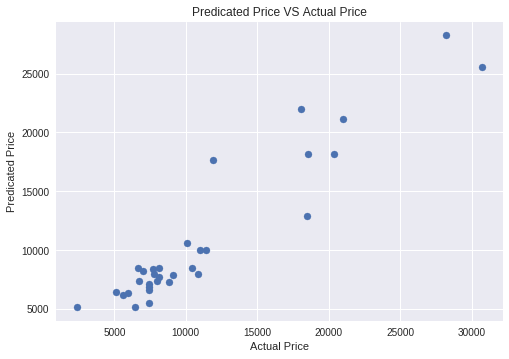

In [97]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test.values)
plt.xlabel('Actual Price')
plt.ylabel('Predicated Price')

plt.title('Predicated Price VS Actual Price')
plt.show()

In [0]:
torch.save(model,'my_model')


In [0]:
saved_model=torch.load('my_model')

In [0]:
y_pred_tensor=saved_model(x_test_tensor)

In [0]:
y_pred=y_pred_tensor.detach().numpy()

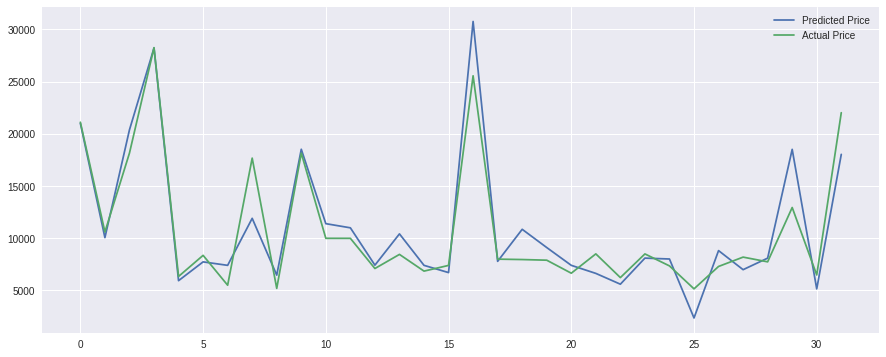

In [105]:
plt.figure(figsize=(15,6))
plt.plot(y_pred,label='Predicted Price')
plt.plot(y_test.values,label='Actual Price')

plt.legend()
plt.show()